# Modelling & Evaluation notebook

## Objectives

### Train a Machine Learning Model:
- Develop a model capable of classifying cherry leaves as healthy or containing powdery mildew based on the provided dataset.

### Evaluate Model Performance:
- Assess the model's effectiveness in distinguishing between healthy and mildew-labeled leaves using appropriate evaluation metrics.

## Inputs

### Preprocessed Image Dataset:
- The dataset containing preprocessed cherry leaf images, annotated with labels indicating whether the leaves are healthy or affected by powdery mildew.

### Training and Validation Sets:
- Split the dataset into training and validation sets for model training and evaluation.

## Outputs

### Trained Machine Learning Model:
- A trained model capable of classifying cherry leaves as healthy or containing powdery mildew.

### Model Evaluation Metrics:
- Metrics such as accuracy, precision, recall, and F1-score to quantify the model's performance.

### Visualization of Results:
- Visualizations (e.g., confusion matrix, ROC curve) to provide a clear understanding of the model's strengths and weaknesses.

### Documentation and Insights:
- Document insights gained from the modeling process, including challenges faced, hyperparameter choices, and potential improvements.

## Additional comments

---

---

## Import regular packages

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread

---

## Set working directory

In [3]:
cwd= os.getcwd()

In [4]:
os.chdir('/workspace/Portfolio-project-5-Milldew-detection-in-Cherry-Leaves/notebooks')
print("You set a new current directory")

You set a new current directory


In [5]:
work_dir = os.getcwd()
work_dir

'/workspace/Portfolio-project-5-Milldew-detection-in-Cherry-Leaves/notebooks'

---

## Set input directory

Set train, validation and test paths

In [6]:
my_data_dir = '/workspace/Portfolio-project-5-Milldew-detection-in-Cherry-Leaves/datasets'
train_path = my_data_dir + '/train'
val_path = my_data_dir + '/validation'
test_path = my_data_dir + '/test'


## Set output directory

In [7]:
version = 'v1'
file_path = f'outputs/{version}'

if 'outputs' in os.listdir(work_dir) and version in os.listdir(work_dir + '/outputs'):
    print('Old version is already available create a new version.')
    pass
else:
    os.makedirs(name=file_path)

Old version is already available create a new version.


## Set labels

In [8]:
train_path = '/workspace/Portfolio-project-5-Milldew-detection-in-Cherry-Leaves/datasets/train'

# List subdirectories (labels) within the training set
labels = os.listdir(train_path)

print("List of labels:", labels)

List of labels: ['healthy', 'milldew']


In [9]:
## Import saved image shape embedding
import joblib
version = 'v1'
image_shape = joblib.load(filename=f"outputs/{version}/image_shape.pkl")
image_shape

(256, 256, 3)

---

# Number of images in train, test and validation data

* train - healthy: 1472 images
* train - milldew: 1472 images
* validation - healthy: 210 images
* validation - milldew: 210 images
* test - healthy: 422 images
* test - milldew: 422 images




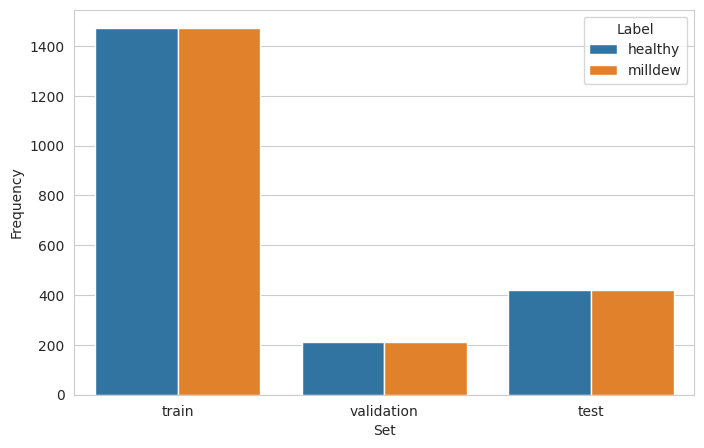

In [10]:
df_freq = pd.DataFrame([])
for folder in ['train', 'validation', 'test']:
    for label in labels:
        df_freq = df_freq.append(
            pd.Series(data={'Set': folder,
                            'Label': label,
                            'Frequency': int(len(os.listdir(my_data_dir + '/' + folder + '/' + label)))}
                      ),
            ignore_index=True
        )

        print(
            f"* {folder} - {label}: {len(os.listdir(my_data_dir+'/'+ folder + '/' + label))} images")

print("\n")
sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))
sns.barplot(data=df_freq, x='Set', y='Frequency', hue='Label')
plt.savefig(f'{file_path}/labels_distribution.png',
            bbox_inches='tight', dpi=150)
plt.show()

---

# Image Augmentation

---

### Image data generator

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2024-01-20 16:57:32.182878: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-01-20 16:57:32.182916: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


### Initialize ImageDataGenerator

In [12]:
augmented_image_data = ImageDataGenerator(rotation_range=20,
                                          width_shift_range=0.10,
                                          height_shift_range=0.10,
                                          shear_range=0.1,
                                          zoom_range=0.1,
                                          horizontal_flip=True,
                                          vertical_flip=True,
                                          fill_mode='nearest',
                                          rescale=1./255
                                          )

### Augment training image dataset

In [13]:
batch_size = 20  # Set batch size
train_set = augmented_image_data.flow_from_directory(train_path,
                                                     target_size=image_shape[:2],
                                                     color_mode='rgb',
                                                     batch_size=batch_size,
                                                     class_mode='binary',
                                                     shuffle=True
                                                     )

train_set.class_indices

Found 2944 images belonging to 2 classes.


{'healthy': 0, 'milldew': 1}

### Augment validation image dataset

In [14]:
validation_set = ImageDataGenerator(rescale=1./255).flow_from_directory(val_path,
                                                                        target_size=image_shape[:2],
                                                                        color_mode='rgb',
                                                                        batch_size=batch_size,
                                                                        class_mode='binary',
                                                                        shuffle=False
                                                                        )

validation_set.class_indices

Found 420 images belonging to 2 classes.


{'healthy': 0, 'milldew': 1}

### Augment test image dataset

In [15]:
test_set = ImageDataGenerator(rescale=1./255).flow_from_directory(test_path,
                                                                  target_size=image_shape[:2],
                                                                  color_mode='rgb',
                                                                  batch_size=batch_size,
                                                                  class_mode='binary',
                                                                  shuffle=False
                                                                  )

test_set.class_indices

Found 844 images belonging to 2 classes.


{'healthy': 0, 'milldew': 1}

## Plot augmented training image

(20, 256, 256, 3)


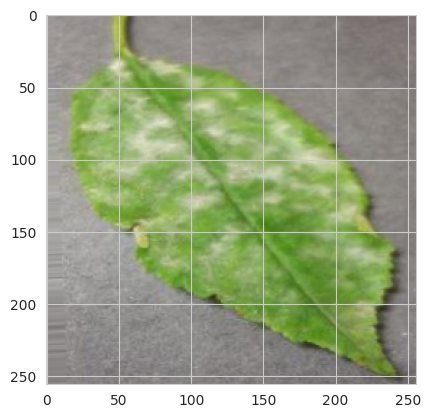

(20, 256, 256, 3)


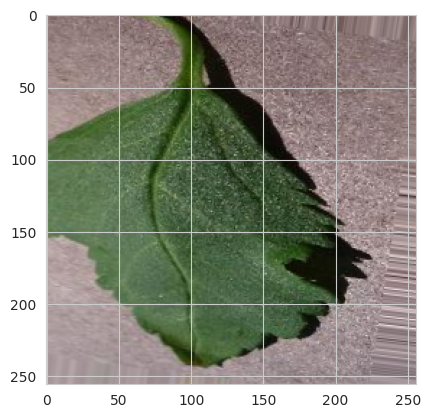

(20, 256, 256, 3)


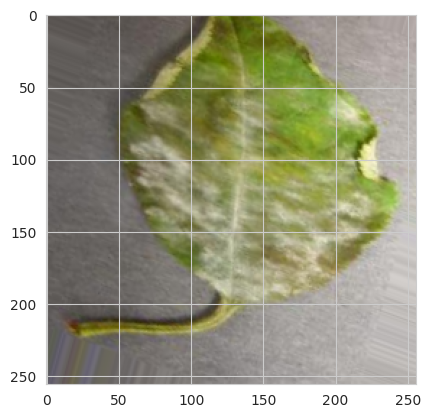

In [16]:
for _ in range(3):
    img, label = train_set.next()
    print(img.shape)  # (1,256,256,3)
    plt.imshow(img[0])
    plt.show()


## Plot augmented validation and test images

(20, 256, 256, 3)


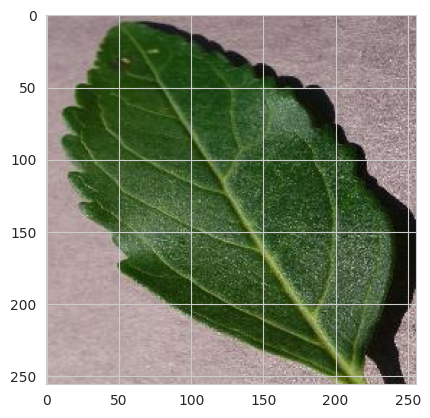

(20, 256, 256, 3)


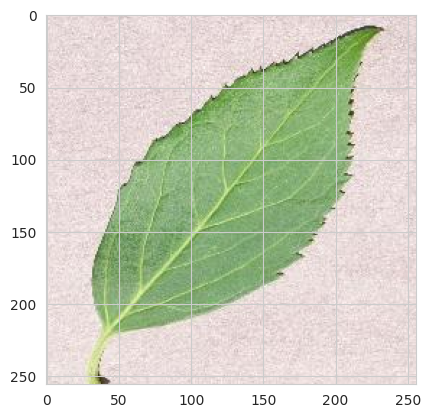

(20, 256, 256, 3)


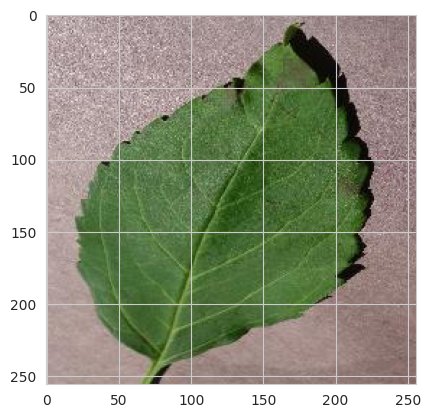

In [17]:
for _ in range(3):
    img, label = validation_set.next()
    print(img.shape)  # (1,256,256,3)
    plt.imshow(img[0])
    plt.show()


(20, 256, 256, 3)


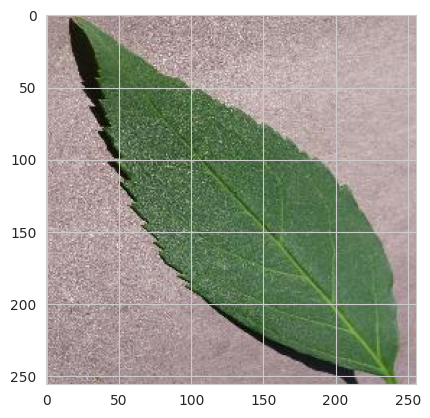

(20, 256, 256, 3)


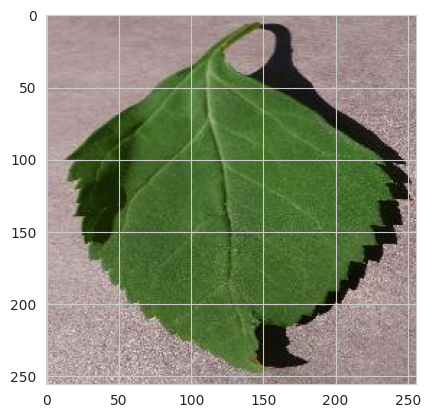

(20, 256, 256, 3)


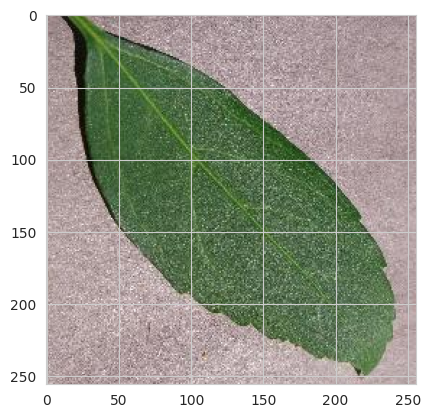

In [36]:
for _ in range(3):
    img, label = test_set.next()
    print(img.shape)  # (1,256,256,3)
    plt.imshow(img[0])
    plt.show()

## Save class indices

In [18]:
joblib.dump(value=train_set.class_indices,
            filename=f"{file_path}/class_indices.pkl")

['outputs/v1/class_indices.pkl']

---

# Model Creation

---

## ML model

* ### Import model packages

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from keras.regularizers import l2
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

* ### Model 

In [27]:
def create_tf_model():
    model = Sequential()

    model.add(Conv2D(filters=32, kernel_size=(3, 3),
              input_shape=image_shape, activation='relu', ))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(filters=64, kernel_size=(3, 3),
              input_shape=image_shape, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(filters=64, kernel_size=(3, 3),
              input_shape=image_shape, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(128, activation='relu'))

    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

    return model


* ### Model summary

In [28]:
image_shape = (256, 256, 3)  # Adjust these dimensions based on your actual image dimensions
create_tf_model().summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 60, 60, 64)        36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 57600)            

* ### Early stopping

In [32]:
early_stop = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)

* ### Reduce learning rate

In [33]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)

## Fit model for model training

In [34]:
model = create_tf_model()
model.fit(train_set,
          epochs=25,
          steps_per_epoch=len(train_set.classes) // batch_size,
          validation_data=validation_set,
          callbacks=[early_stop],
          verbose=1
        )

Epoch 1/25
147/147 [==============================] - 166s 1s/step - loss: 0.6430 - accuracy: 0.8461 - val_loss: 0.2017 - val_accuracy: 0.9833
Epoch 2/25
147/147 [==============================] - 227s 2s/step - loss: 0.1870 - accuracy: 0.9781 - val_loss: 0.1077 - val_accuracy: 0.9976
Epoch 3/25
147/147 [==============================] - 213s 1s/step - loss: 0.1400 - accuracy: 0.9791 - val_loss: 0.0931 - val_accuracy: 0.9929
Epoch 4/25
147/147 [==============================] - 204s 1s/step - loss: 0.1160 - accuracy: 0.9846 - val_loss: 0.0879 - val_accuracy: 0.9881
Epoch 5/25
147/147 [==============================] - 214s 1s/step - loss: 0.1021 - accuracy: 0.9846 - val_loss: 0.0705 - val_accuracy: 0.9952
Epoch 6/25
147/147 [==============================] - 184s 1s/step - loss: 0.0793 - accuracy: 0.9932 - val_loss: 0.0963 - val_accuracy: 0.9810
Epoch 7/25
147/147 [==============================] - 174s 1s/step - loss: 0.0874 - accuracy: 0.9873 - val_loss: 0.0589 - val_accuracy: 0.9952

## Save model

In [35]:
model.save('outputs/v1/cherry_leaves_model.h5')

---

## Model performance

---

### Model learning curve

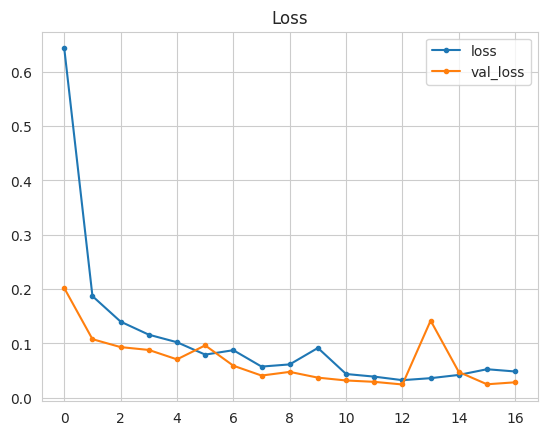

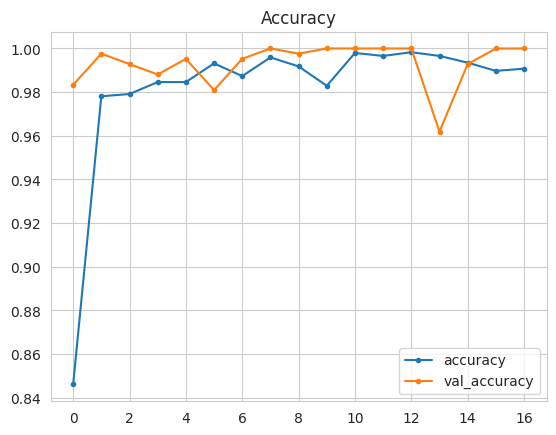

In [36]:
losses = pd.DataFrame(model.history.history)

sns.set_style("whitegrid")
losses[['loss', 'val_loss']].plot(style='.-')
plt.title("Loss")
plt.savefig(f'{file_path}/model_training_losses.png',
            bbox_inches='tight', dpi=150)
plt.show()

print("\n")
losses[['accuracy', 'val_accuracy']].plot(style='.-')
plt.title("Accuracy")
plt.savefig(f'{file_path}/model_training_acc.png',
            bbox_inches='tight', dpi=150)
plt.show()

## Model evaluation

Load saved model

In [37]:
from keras.models import load_model
model = load_model('outputs/v1/cherry_leaves_model.h5')

Evaluate model on test set

In [38]:
evaluation = model.evaluate(test_set)

43/43 [==============================] - 14s 324ms/step - loss: 0.0355 - accuracy: 0.9976


### Save evaluation pickle

In [39]:
joblib.dump(value=evaluation,
            filename=f"outputs/v1/evaluation.pkl")

['outputs/v1/evaluation.pkl']

## Predict on new data

Load a random image as PIL

Image shape: (256, 256), Image mode: RGB


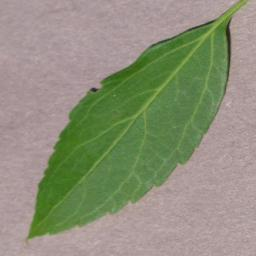

In [40]:
from tensorflow.keras.preprocessing import image

pointer = 66
label = labels[0]  # select Uninfected or Parasitised

pil_image = image.load_img(test_path + '/' + label + '/' + os.listdir(test_path+'/' + label)[pointer],
                           target_size=image_shape, color_mode='rgb')
print(f'Image shape: {pil_image.size}, Image mode: {pil_image.mode}')
pil_image

Convert image to array and prepare for prediction

In [41]:
my_image = image.img_to_array(pil_image)
my_image = np.expand_dims(my_image, axis=0)/255
print(my_image.shape)

(1, 256, 256, 3)


Predict class probabilities

In [42]:
pred_proba = model.predict(my_image)[0, 0]

target_map = {v: k for k, v in train_set.class_indices.items()}
pred_class = target_map[pred_proba > 0.5]

if pred_class == target_map[0]:
    pred_proba = 1 - pred_proba

print(pred_proba)
print(pred_class)

0.9935626089572906
healthy


---

In [ ]:
import data_preprocessing

file_path = "/workspace/Portfolio-project-5-Milldew-detection-in-Cherry-Leaves/your/dataset.csv"
df = data_preprocessing.load_dataset(file_path)
